In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2
import random
import os

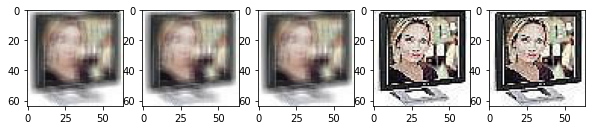

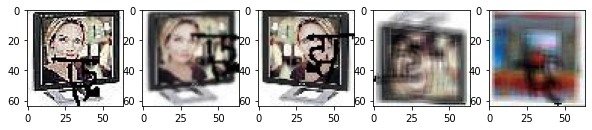

In [15]:
# Lets see some sample images in background & hi folder.
# First five images of folder
def sample_plot(img_folder):
    plt.figure(figsize=(10,10))
    for i in range(5):
        file = os.listdir(img_folder)[i]
        image_path= os.path.join(img_folder, file)
        img=mpimg.imread(image_path)
        ax=plt.subplot(1,5,i+1)
        plt.imshow(img)
#For without text images
sample_plot(r'C:\Users\HP\Desktop\contest\training\background')
#For text images
sample_plot(r'C:\Users\HP\Desktop\contest\training\hi')

            

In [17]:
IMG_WIDTH=32
IMG_HEIGHT=32
img_folder=r'C:\Users\HP\Desktop\contest\training'

In [18]:
# Read the image file from the folder and convert it to the right color format.
# Resize the image based on the input dimension required for the model
# Convert the image to a Numpy array with float32 as the datatype
# Normalize the image array to have values scaled down between 0 and 1 from 0 to 255 for a similar data distribution.
# It helps with faster convergence.
def dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = dataset(r'C:\Users\HP\Desktop\contest\training')

In [19]:
# Create a dictionary for all unique values for the classes
target_dict= {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'background': 0, 'hi': 1}

In [20]:
# Convert the class_names to their respective numeric value based on the dictionary
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [21]:
# Creating a deep learning model and compiling it
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
final = cnn.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=10)

Epoch 1/10
184/184 [==============================] - 7s 35ms/step - loss: 0.4945 - accuracy: 0.7971
Epoch 2/10
184/184 [==============================] - 7s 36ms/step - loss: 0.3326 - accuracy: 0.8735
Epoch 3/10
184/184 [==============================] - 7s 38ms/step - loss: 0.2653 - accuracy: 0.9062
Epoch 4/10
184/184 [==============================] - 7s 37ms/step - loss: 0.2160 - accuracy: 0.9294
Epoch 5/10
184/184 [==============================] - 7s 41ms/step - loss: 0.1630 - accuracy: 0.9423
Epoch 6/10
184/184 [==============================] - 7s 38ms/step - loss: 0.1277 - accuracy: 0.9534
Epoch 7/10
184/184 [==============================] - 7s 38ms/step - loss: 0.1108 - accuracy: 0.9614
Epoch 8/10
184/184 [==============================] - 7s 36ms/step - loss: 0.0947 - accuracy: 0.9666 0s - loss: 0.095
Epoch 9/10
184/184 [==============================] - 7s 37ms/step - loss: 0.0816 - accuracy: 0.9717
Epoch 10/10
184/184 [==============================] - 7s 38ms/step - loss

In [23]:
x_train=np.array(img_data, np.float32)
x_train.shape

(5875, 32, 32, 3)

In [24]:
# Doing same with testing folder
IMG_WIDTH=32
IMG_HEIGHT=32
def test_dataset(test_img_folder):
   
    test_img_data_array=[]
    for file in os.listdir(test_img_folder):
        image_path= os.path.join(test_img_folder, file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        test_img_data_array.append(image)            
    return test_img_data_array
# extract the image array 
test_img_data =test_dataset(r'C:\Users\HP\Desktop\contest\test\test')

In [25]:
x_test=np.array(test_img_data, np.float32)
x_test.shape

(98, 32, 32, 3)

In [30]:
# Using trained model for predicting images in test folder.
prediction = cnn.predict(x_test)
text_class = [int(np.argmax(element)) for element in prediction]

In [36]:
text_class[:5]

[1, 0, 0, 0, 1]

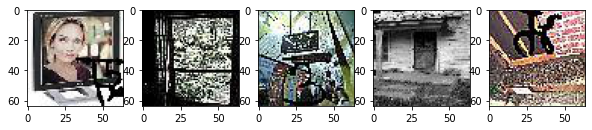

In [35]:
sample_plot(r'C:\Users\HP\Desktop\contest\test\test')

In [37]:
# Converting in JSON file.
import json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename):
    res = {}
    for i in range(1,99):
        test_set = str(i) + '.jpg'
        res[test_set] = text_class[i-1]

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./result1.json')